# EXO 1

# Question 1

In [ ]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
from scipy import integrate
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
V0 = 0.05
lamda = 0.3
theta = 0.05
mu = 0.1
alpha = 0.6
r20 = 2.5
n = 20
dt = 10**(-5)
m = 10**5

In [ ]:
def c(i,r=2.5,alpha=0.6,n=n):
  return (r**((1-alpha)*(i-1-n/2))*(r**(1-alpha)-1))/(gamma(alpha)*gamma(2-alpha))

def x(i,r=2.5,alpha=0.6,n=n):
  return ((1-alpha)/(2-alpha)) * ((r**(2-alpha)-1)/(r**(1-alpha)-1)) * r**(i-1-n/2)

def g0(t, V0 = 0.05, lamda = 0.3, theta = 0.05):
  s = 0
  for i in range(1,n+1):
    f = lambda t : np.dot(c(i)/x(i),1-np.exp(-t*x(i)))
    s = s + f(t)
  return V0 + lamda*theta*s


In [ ]:
U = np.zeros((m,n))
V = np.zeros(m)

for k in range(m):
  if k==0:
    V[0]= g0(0)
    U[0,:] = 0
  else:
    s = 0
    for i in range(1,n):
      z = np.random.normal(0,dt)
      U[k][i] = (1/(1+x(i)*dt))*(U[k-1][i]-lamda*V[k-1]*dt+mu*np.sqrt(max(0,V[k-1]))*z)
      s = s + c(i)*U[k][i]
    V[k] = g0(k*dt)+s

In [ ]:
time_grid=np.arange(0,1,dt)
fig = go.Figure(data=[go.Scatter(x=time_grid, y=V)], 
                layout=go.Layout(
                title=go.layout.Title(text="Simulation of Spot Variance in the Lifted Heston model (n=20)")))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Question 2

In [ ]:
from scipy.stats import linregress
from scipy import stats

In [ ]:
q = np.array([0.5,1,1.5,2])
lags = np.array([1,2,3,4,5,6,7,8,9,10])

def moment(q,delta):
  diff = 0
  for i in range(1,len(V)-delta):
    diff = diff + np.abs(np.log(np.sqrt(V[i+delta]/V[i])))**q
  return diff/(len(V)-delta)

In [ ]:
m_vector = np.zeros((len(q),len(lags)))

for i in range(len(lags)):
  for j in range(len(q)):
    m_vector[j][i] = moment(q[j],lags[i])

In [ ]:
log_moment = np.log(m_vector)
log_lags = np.log(lags)

In [ ]:
res = list()
# regression log(delta)
for i in range(len(q)):
  res.append(stats.linregress(log_lags, log_moment[i,:]).slope)

In [ ]:
stats.linregress(q, res).slope

0.4831604748242704

In [ ]:
def plot_graphs(log_lags,log_moment):

    fig = go.Figure()

    for i in range(len(q)):

      fig.add_trace(
        go.Scatter(name='q ='+str(q[i]), x=log_lags, y=log_moment[i,:],
                   showlegend=True)
    )
  
    fig.update_xaxes(title_text="Log(∆)")
    fig.update_yaxes(title_text="Log(m(q,∆))")
    fig.update_layout(title_text=" m(q,∆) for the Lifted Heston model", height=600, width=600)
    return fig


In [ ]:
plot_graphs(log_lags,log_moment)

# Question 3

In [ ]:
l =[1,2,3,4,5,6,7,8,9,10]

U_3 = np.zeros((math.floor(m/len(l)),n))
V_3 = np.zeros((math.floor(m/len(l)),len(l)))

for j in range(len(l)):
  for k in range(math.floor(m/len(l))):
    if k==0:
      V_3[0,:]= g0(0)
      U_3[0,:] = 0
    else:
      s = 0
      for i in range(1,n):
        z = np.random.normal(0,dt)
        U_3[k][i] = (1/(1+x(i)*dt))*(U_3[k-1][i]-lamda*V_3[k-1][j]*dt+mu*np.sqrt(max(0,V_3[k-1][j]))*z)
        s = s + c(i)*U_3[k][i]
      V_3[k][j] = g0(k*l[j]*dt)+s

In [ ]:
def moment_3(q,delta,V_3):
  diff = 0
  for i in range(1,len(V_3)-delta):
    diff = diff + np.abs(np.log(np.sqrt(V_3[i+delta]/V_3[i])))**q
  return diff/(len(V_3)-delta)

In [ ]:
H = []

for index in range(len(l)):
  m_vector_3 = np.zeros((len(q),len(lags)))

  for i in range(len(lags)):
    for j in range(len(q)):
      V_3_l = V_3[:,index]
      m_vector_3[j][i] = moment_3(q[j],lags[i],V_3_l)

  log_moment = np.log(m_vector_3)
  log_lags = np.log(lags)

  res = list()
  # regression log(delta)
  for i in range(len(q)):
    res.append(stats.linregress(log_lags, log_moment[i,:]).slope)

  H.append(stats.linregress(q, res).slope)

In [ ]:
fig = go.Figure([go.Scatter(x=l, y=H)])
fig.update_xaxes(title_text="l")
fig.update_yaxes(title_text="H(l)")
fig.update_layout(title_text=" Scaling of H(l) for the Lifted Heston model ", height=600, width=600)
fig.show()

# Question 4

In [ ]:
# part 1
W = np.zeros(m)
W[0] = 0.0

# Simulation du processus
for i in range(1, m):
    dW = np.sqrt(dt) * np.random.normal()
    W[i] = W[i-1] + dW

In [ ]:
fig = go.Figure([go.Scatter(x=[i for i in range(m)], y=W)])
fig.update_layout(title_text=" Simulation of classical brownian motion", height=600)
fig.show()

In [ ]:
q = np.array([0.5,1,1.5,2])
lags = np.array([1,2,3,4,5,6,7,8,9,10])

def moment_w(q,delta):
  diff = 0
  for i in range(1,len(W)-delta):
    diff = diff + np.abs(W[i+delta]-W[i])**q
  return diff/(len(W)-delta)

m_vector_w = np.zeros((len(q),len(lags)))

for i in range(len(lags)):
  for j in range(len(q)):
    m_vector_w[j][i] = moment_w(q[j],lags[i])

log_moment_w = np.log(m_vector_w)
log_lags = np.log(lags)

res_w = list()
# regression log(delta)
for i in range(len(q)):
  res_w.append(stats.linregress(log_lags, log_moment_w[i,:]).slope)
  #res_w.append(stats.linregress(lags, m_vector_w[i,:]).slope)

H_W = stats.linregress(q, res_w).slope

In [ ]:
H_W

0.5012810036372528

In [ ]:
plot_graphs(log_lags,log_moment_w)

In [ ]:
#part 3
l =[1,2,3,4,5,6,7,8,9,10]
W_4 = np.zeros((m,len(l)))
W_4[:, 0] = 0.0

# Simulation du processus
for j in range(len(l)):
  for i in range(1, m):
      dW = np.sqrt(dt) * np.random.normal()
      W_4[i, j] = W_4[i-1,j] + dW

def moment_4(q,delta,W):
  diff = 0
  for i in range(1,len(W)-delta):
    diff = diff + np.abs(W[i+delta]-W[i])**q
  return diff/(len(W)-delta)

H_4 = []

for index in range(len(l)):
  m_vector_4 = np.zeros((len(q),len(lags)))

  for i in range(len(lags)):
    for j in range(len(q)):
      W_4_l = W_4[:,index]
      m_vector_4[j][i] = moment_4(q[j],lags[i],W_4_l)

  log_moment_4 = np.log(m_vector_4)
  log_lags = np.log(lags)

  res_4 = list()
  # regression log(delta)
  for i in range(len(q)):
    res_4.append(stats.linregress(log_lags, log_moment_4[i,:]).slope)

  H_4.append(stats.linregress(q, res_4).slope)

In [ ]:
H_4

[0.4994470241098151,
 0.49512974893213607,
 0.499379345769687,
 0.5051108044239248,
 0.5016906604430428,
 0.5033326193739405,
 0.5024775979125555,
 0.4989599648201525,
 0.5031341113320659,
 0.4992911302007942]

In [ ]:
fig = go.Figure([go.Scatter(x=l, y=H_4)])
fig.update_layout(yaxis_range=[0.45,0.55])
fig.update_xaxes(title_text="l")
fig.update_yaxes(title_text="H(l)")
fig.update_layout(title_text=" Scaling of H(l) for the Lifted Heston model in the case of a Classical brownian motion", height=600, width=900)
fig.show()

# Question 5

In [ ]:
from scipy.linalg import cholesky
def fractional_brownian_motion(dt,m,H):
  """ Simulate a fractional Browninal motion with exponent H
  """
  # Time steps for the approximation
  
  t=np.linspace(0,m,m+1)
  t = t * dt

  # Compute the variance-covariance matrix of the Gaussian vector WtH
  mat=[]
  for i in t[1:] :
    ligne=[]
    for j in t[1:] :
      ligne.append(0.5*(pow(abs(i),2*H )+pow(abs(j),2*H )-pow(abs(i-j),2*H )))
    mat.append(ligne)

  # Calculate the Cholesky factorization
  cholesky_decomposition = cholesky(np.array(mat),lower=True)

  #Simulate M independant N(0,1) random variables
  gaus=np.random.randn(m)
  fbm= np.dot(cholesky_decomposition,gaus).tolist()
  
  #return [0] + np.dot(cholesky_decomposition.transpose(),gaus).tolist()
  return [0] + fbm

In [ ]:
m = 10**3
dt = 10 **(-3)
H = 0.1

W_H = fractional_brownian_motion(dt,m,H)

In [ ]:
fig = go.Figure([go.Scatter(x=[i for i in range(m)], y=W_H)])
fig.update_layout(title_text=" Simulation of a fractional brownian motion", height=600)
fig.show()

In [ ]:
q = np.array([0.5,1,1.5,2])
lags = np.array([1,2,3,4,5,6,7,8,9,10])

def moment_w_h(q,delta):
  diff = 0
  for i in range(1,len(W_H)-delta):
    diff = diff + np.abs(W_H[i+delta]-W_H[i])**q
  return diff/(len(W_H)-delta)

m_vector_w_h = np.zeros((len(q),len(lags)))

for i in range(len(lags)):
  for j in range(len(q)):
    m_vector_w_h[j][i] = moment_w_h(q[j],lags[i])

log_moment_w_h = np.log(m_vector_w_h)
log_lags = np.log(lags)

res_w_h = list()
# regression log(delta)
for i in range(len(q)):
  res_w_h.append(stats.linregress(log_lags, log_moment_w_h[i,:]).slope)
  #res_w.append(stats.linregress(lags, m_vector_w[i,:]).slope)

H_W_h = stats.linregress(q, res_w_h).slope

In [ ]:
H_W_h 

0.10544995204327397

In [ ]:
plot_graphs(log_lags,log_moment_w_h)

In [ ]:
#part 3
l =[1,2,3,4,5,6,7,8,9,10]
W_5 = np.zeros((m,len(l)))
#W_5[:, 0] = 0.0

# Simulation du processus
for j in range(len(l)):
  W_5[:, j] = fractional_brownian_motion(dt,m-1,H)

def moment_5(q,delta,W):
  diff = 0
  for i in range(1,len(W)-delta):
    diff = diff + np.abs(W[i+delta]-W[i])**q
  return diff/(len(W)-delta)

H_5 = []

for index in range(len(l)):
  m_vector_5 = np.zeros((len(q),len(lags)))

  for i in range(len(lags)):
    for j in range(len(q)):
      W_5_l = W_5[:,index]
      m_vector_5[j][i] = moment_5(q[j],lags[i],W_5_l)

  log_moment_5 = np.log(m_vector_5)
  log_lags = np.log(lags)

  res_5 = list()
  # regression log(delta)
  for i in range(len(q)):
    res_5.append(stats.linregress(log_lags, log_moment_5[i,:]).slope)

  H_5.append(stats.linregress(q, res_5).slope)

In [ ]:
H_5

[0.1031628545614109,
 0.0952574271998243,
 0.12846997367567586,
 0.07665709901896364,
 0.1331082106542108,
 0.08658295288088683,
 0.10464571679562729,
 0.1095929235250022,
 0.09877717085789903,
 0.0871039013203383]

In [ ]:
fig = go.Figure([go.Scatter(x=l, y=H_5)])
fig.update_layout(yaxis_range=[0.001,0.4])
fig.update_xaxes(title_text="l")
fig.update_yaxes(title_text="H(l)")
fig.update_layout(title_text=" Scaling of H(l) for the Lifted Heston model in the case of a fractional brownian motion", height=600,width)
fig.show()

# EXO 2

# Question 1 & 2 : (In PDF File)

# Question 3

In [ ]:
import scipy

# M is the number of time discretization steps
# n is the number of factors and rn = r
V0 = 0.02
lamb = 0.3
lamda = 0.3
theta = 0.02
mu = 0.1
alpha = 0.6
r20 = 2.5
n = 20
dt = 10**(-5)
m = 10**5
r_int = 0

def c(i,r=2.5,alpha=0.6,n=20):
  return (r**((1-alpha)*(i-1-n/2))*(r**(1-alpha)-1))/(gamma(alpha)*gamma(2-alpha))

def x(i,r=2.5,alpha=0.6,n=20):
  return ((1-alpha)/(2-alpha)) * ((r**(2-alpha)-1)/(r**(1-alpha)-1)) * r**(i-1-n/2)



In [ ]:
alpha2=1
L=100
rint=0

In [ ]:
from scipy.integrate import quad


In [ ]:
def Ch_Lifted_Heston(u,S0=1, K=1.2,r_int = 0, T=1, rho=-0.7, lamb= 0.3, theta= 0.02, nu= 0.3, V0= 0.02, n=5, rn=1 + 10*n**(-0.9), alpha= 0.6, M= 100): #OK
        # Pas de discretisation
        rn=1 + 10*n**(-0.9)
        dt=T/M 

        # u en nombre complexe
        u=complex(0,1)*u

        # la fonction en argument de psi
        F = lambda u,v : 0.5*(u**2-u)+(rho*nu*u-lamb)*v+((nu**2)/2)*v**2

        # Les vecteurs c(i) et x(i) de n elements
        cj=np.array([c(i,rn,alpha,n) for i in range(1,n+1)],dtype=complex)
        xi=np.array([x(i,rn,alpha,int(n)) for i in range(1,n+1)],dtype=complex)

        # Matrice de la schene de discretisation pour pour les temps t_k et l'equation i
        Argu=np.zeros((M+1,n),dtype=complex)

        coef=1/(1+xi*dt)
        # The scheme
        for i in range(1,M+1):
            Argu[i]=coef*(Argu[i-1]+F(u,np.dot(cj,Argu[i-1]))*dt)

        # La matrice Psi de discretisation en temps et pour toutes les equations i
        Psi=Argu

         # It will be a column of a M+1 components such that each one is the F(u, sum(c_i psi_i at time t_k))

        res=F(u,Psi.dot(cj))
        elements=[]
        g = lambda t: V0+lamb*theta*np.dot(cj/xi,1-np.exp(-t*xi))
        for i in range(M+1):
            elements.append(g(T-i*dt))

        elements=np.array(elements,dtype=complex)

        integral=dt*(res*elements).sum()

        return np.exp(u*np.log(S0)+integral)

# Question 4

In [ ]:
def Call_Price_Lifted_Heston(S0=1, K=1,r_int = 0, T=1, rho=-0.7, lamb= 0.3, theta= 0.02, nu= 0.3, V0= 0.02, 
                             n=5, rn=1.674, alpha= 0.6, M= 100, alpha2 = 1, L= 100):
    LogK=np.log(K)
    integrand = lambda u: np.real(Ch_Lifted_Heston(u - (alpha2 + 1)*1j,S0,K,r_int,T,rho,lamb,theta,nu,V0,n,rn,alpha,M)*np.exp(-1j*LogK*u)/
                                  ((alpha2 + 1j*u)*(alpha2 + 1 + 1j*u)))
    
    return np.exp(-r_int*T-alpha2*LogK) * quad(integrand,1e-15, L, limit=2000)[0]/np.pi
    

In [ ]:
Call_Price_Lifted_Heston(S0=1, K=1,r_int = 0, T=1, rho=-0.7, lamb= 0.3, theta= 0.02, nu= 0.3, V0= 0.02, 
                             n=50, rn=1.6746414238367815, alpha= 0.6, M= 100, alpha2 = 1, L= 100)

0.04633886991931641

# Question 5


In [ ]:
from scipy.stats import norm

In [ ]:
def black_and_scholes(S0,K,T,rint=0.0,sigma=0.02):
  """ Approximates the call option price in the Black and Scholes model
  Keywords arguments:
  S0 = Initial price
  K = strike
  T = maturity
  rint = interest rate
  sigma = volatility
  """
  d_1 = float(float((np.log(S0/K)+(rint+(sigma**2)/2)*T))/float((sigma*(np.sqrt(T)))))
  d_2 = float(float((np.log(S0/K)+(rint-(sigma**2)/2)*T))/float((sigma*(np.sqrt(T)))))
  price_bs = float(S0*norm.cdf(d_1) - K*np.exp(-rint*T)*norm.cdf(d_2))
  return price_bs

In [ ]:
def implied_volatility( price, S0, K, T, r,method="fsolve", disp=True ):
    """ Returns Implied volatility
        methods:  fsolve (default) or brent
    """

    def obj_fun(vol):
        return ( price - black_and_scholes(S0,K,T,rint=r,sigma=vol) )
    
    if method == "brent":
        x, r = scpo.brentq( obj_fun, a=1e-15, b=500, full_output=True)
        if r.converged == True:
            return x
    if method == "fsolve":
        X0 = [0.02, 0.05, 0.3]   # set of initial guess points
        for x0 in X0:
            x, _, solved, _ = scpo.fsolve( obj_fun, x0, full_output=True, xtol=1e-8)
            if solved == 1:
                return x[0]  
    
    if disp == True:
        print("Strike", K)
    return -1

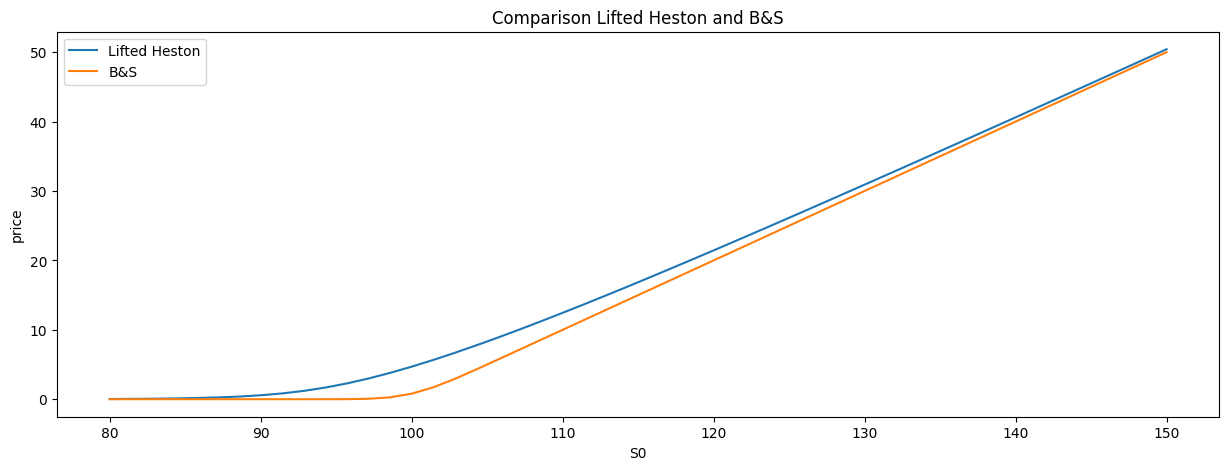

In [ ]:
# Computing of the prices and plotting of the curves
list_price_heston=[]
list_price_bs=[]
S0 = np.linspace(80,150,50)
for S in S0:
  price_lheston = Call_Price_Lifted_Heston(S, K=100,r_int = 0, T=1, rho=-0.7, lamb= 0.3, theta= 0.02, nu= 0.3, V0= 0.02, 
                             n=20, rn=1.6746414238367815, alpha= 0.6, M= 100, alpha2 = 1, L= 100)
  price_bs = black_and_scholes(S,K=100,T=1,rint=0)
  list_price_heston.append(price_lheston)
  list_price_bs.append(price_bs)

fig =  plt.figure()
fig.set_size_inches(15,5)
plt.ylabel('price')
plt.xlabel('S0')
plt.title('Comparison Lifted Heston and B&S')
plt.plot(S0,list_price_heston, label='Lifted Heston')
plt.plot(S0,list_price_bs, label='B&S')
plt.legend()
plt.show()



In [ ]:
from scipy.interpolate import interp1d

from scipy.optimize import fsolve
import scipy.optimize as scpo
from scipy.stats import norm

# A) For T = 1 choose the truncation level L = 100. Consider 20 equidistant log strikesbetween -1.2 and 0.2. Plot the implied volatility smiles for n = 5, 10, 20, 50 factors.

In [ ]:
logK=np.linspace(-1.2,0.2,20)
K_vec=np.exp(logK)
n_vec =np.array([5,10,20,50])

In [ ]:
Price = np.zeros((len(n_vec),len(K_vec)))
BS_prices=np.zeros(len(K_vec))
for i in range(len(n_vec)):
        for j in range(len(K_vec)):
            Price[i][j]= Call_Price_Lifted_Heston(S0=1, K=K_vec[j], r_int=0, T=1, rho=-0.7, lamb=0.3, theta=0.02,
                                               nu=0.3, V0=0.02, n=n_vec[i], alpha=0.6,
                                               M=100, alpha2=1, L=100)
            BS_prices[j]=black_and_scholes(S0=1,K=K_vec[j],T=1,rint=0.0,sigma=0.02)


In [ ]:
IV_Hest = np.zeros((len(n_vec),len(K_vec)))
for j in range(len(n_vec)):
    for i in range(len(K_vec)):
        IV_Hest[j][i]=implied_volatility( Price[j][i], S0=1, K=K_vec[i], T=1, r=0 ) 
    
print(np.array(IV_Hest))

[[0.3409894  0.33175734 0.32226862 0.31246821 0.30231838 0.2917902
  0.28084818 0.26944317 0.25751221 0.24497893 0.23175067 0.21771223
  0.20271777 0.18658259 0.16908215 0.14999529 0.12939563 0.10926038
  0.09716091 0.09647816]
 [0.35652814 0.34652856 0.33622507 0.32556077 0.3145144  0.30306675
  0.2911794  0.27879401 0.26583929 0.25223283 0.23787568 0.22264277
  0.20637204 0.18885308 0.16982003 0.14898749 0.126385   0.10461663
  0.09386419 0.09561539]
 [0.36501682 0.35458845 0.34381735 0.33265915 0.32110796 0.30914843
  0.29673635 0.28380618 0.27028241 0.2560808  0.24109984 0.22520898
  0.20823661 0.18995739 0.17008149 0.14828445 0.12456285 0.1019417
  0.09223228 0.09533361]
 [0.370332   0.35963115 0.34855936 0.33708634 0.32521716 0.3129368
  0.30019524 0.28692172 0.27303872 0.25846159 0.24308739 0.22678172
  0.20936645 0.19060629 0.17019557 0.14778327 0.12334094 0.10019804
  0.09127353 0.09523521]]


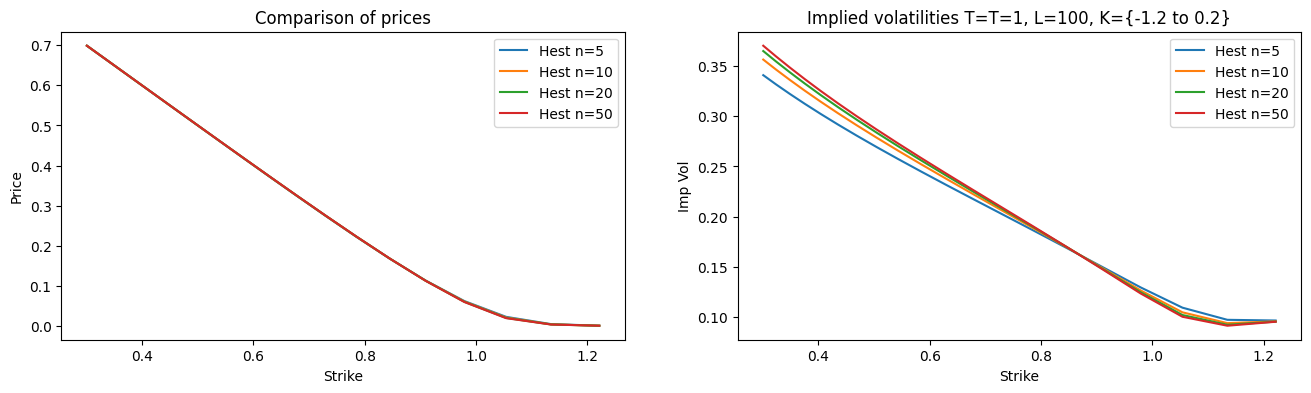

In [ ]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

for i in range(len(n_vec)):
    ax1.plot(K_vec, Price[i,:], label="Hest n={}".format(n_vec[i]))
    ax1.set_title("Comparison of prices"); ax1.set_xlabel("Strike"); ax1.set_ylabel("Price")

    ax2.plot(K_vec, IV_Hest[i,:], label="Hest n={}".format(n_vec[i]))
    ax2.set_title("Implied volatilities T=T=1, L=100, K={-1.2 to 0.2}"); ax2.set_xlabel("Strike"); ax2.set_ylabel("Imp Vol")
ax1.legend(); ax2.legend(); plt.show()

# For T = 1/26 choose the truncation level L = 1000. Consider 20 equidistant log strikes between -0.15 and 0.05. Plot the implied volatility smiles for n = 5, 10, 20, 50 factors.

In [ ]:
logK=np.linspace(-0.15,0.05,20)
K_vec1=np.exp(logK)
n_vec1=np.array([5,10,20,50])

In [ ]:
Price1 = np.zeros((len(n_vec1),len(K_vec1)))
for i in range(len(n_vec1)):
        for j in range(len(K_vec1)):
            Price1[i][j]= Call_Price_Lifted_Heston(S0=1, K=K_vec1[j], r_int=0, T=1/26, rho=-0.7, lamb=0.3, theta=0.02,
                                               nu=0.3, V0=0.02, n=n_vec1[i], alpha=0.6,
                                               M=100, alpha2=1, L=1000)

In [ ]:
IV_Hest1 = np.zeros((len(n_vec1),len(K_vec1)))
for j in range(len(n_vec1)):
    for i in range(len(K_vec)):
        IV_Hest1[j][i]=implied_volatility( Price1[j][i], S0=1, K=K_vec1[i], T=1/26, r=0 ) 
    
print(np.array(IV_Hest))

[[0.3409894  0.33175734 0.32226862 0.31246821 0.30231838 0.2917902
  0.28084818 0.26944317 0.25751221 0.24497893 0.23175067 0.21771223
  0.20271777 0.18658259 0.16908215 0.14999529 0.12939563 0.10926038
  0.09716091 0.09647816]
 [0.35652814 0.34652856 0.33622507 0.32556077 0.3145144  0.30306675
  0.2911794  0.27879401 0.26583929 0.25223283 0.23787568 0.22264277
  0.20637204 0.18885308 0.16982003 0.14898749 0.126385   0.10461663
  0.09386419 0.09561539]
 [0.36501682 0.35458845 0.34381735 0.33265915 0.32110796 0.30914843
  0.29673635 0.28380618 0.27028241 0.2560808  0.24109984 0.22520898
  0.20823661 0.18995739 0.17008149 0.14828445 0.12456285 0.1019417
  0.09223228 0.09533361]
 [0.370332   0.35963115 0.34855936 0.33708634 0.32521716 0.3129368
  0.30019524 0.28692172 0.27303872 0.25846159 0.24308739 0.22678172
  0.20936645 0.19060629 0.17019557 0.14778327 0.12334094 0.10019804
  0.09127353 0.09523521]]


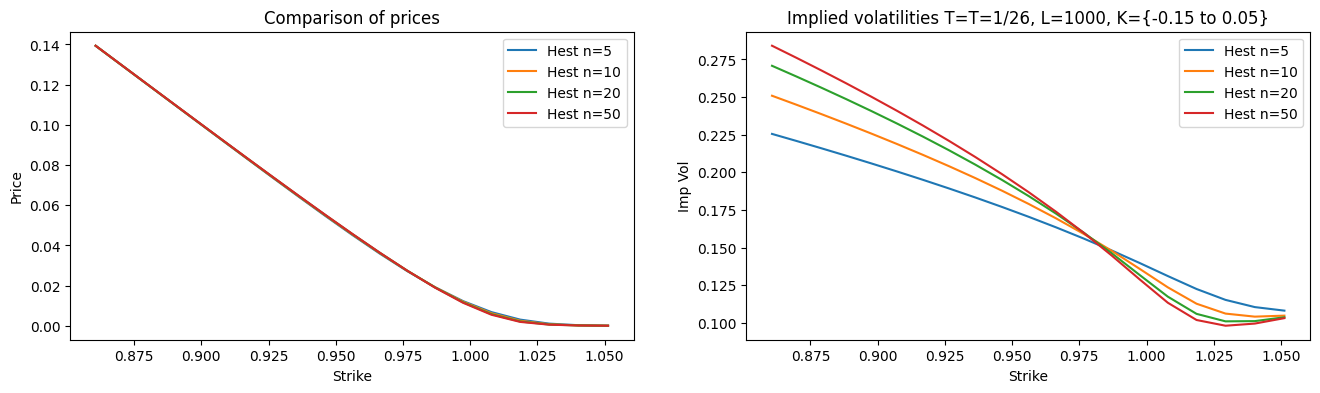

In [ ]:
fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

for i in range(len(n_vec1)):
    ax1.plot(K_vec1, Price1[i,:], label="Hest n={}".format(n_vec1[i]))
    ax1.set_title("Comparison of prices"); ax1.set_xlabel("Strike"); ax1.set_ylabel("Price")

    ax2.plot(K_vec1, IV_Hest1[i,:], label="Hest n={}".format(n_vec1[i]))
    ax2.set_title("Implied volatilities T=T=1/26, L=1000, K={-0.15 to 0.05}"); ax2.set_xlabel("Strike"); ax2.set_ylabel("Imp Vol")
ax1.legend(); ax2.legend(); plt.show()

# EXO 3

# Question 1

For this exercice, since we have MC simulations, we will use a timer function to calculate the execution time for each function

In [ ]:
import functools
import time
from threading import Timer

# this function is used to calculate the execution time
def timer(func):
    """Print the runtime of the decorated function"""

    @functools.wraps(func)
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()  # 1
        value = func(*args, **kwargs)
        end_time = time.perf_counter()  # 2
        run_time = end_time - start_time  # 3
        print(f"Finished {func.__name__!r} in {run_time:.4f} secs")
        return value

    return wrapper_timer

In [ ]:
import numpy as np
from scipy.integrate import cumtrapz

H= 0.1
ksi = 0.02
rho = -0.9
eta = 1.9
n = 20
rn = 1 + 10*n**(-0.9)
T = 1
M = 1000

def c(i,r=rn,alpha=H+0.5,n=n):
  return (r**((1-alpha)*(i-1-n/2))*(r**(1-alpha)-1))/(gamma(alpha)*gamma(2-alpha))

def x(i,r=rn,alpha=H+0.5,n=n):
  return ((1-alpha)/(2-alpha)) * ((r**(2-alpha)-1)/(r**(1-alpha)-1)) * r**(i-1-n/2)


def correlated_BM(dt,rho,M):
    # Simulating B
    X = np.random.normal(0,(dt**(1/2)),(2, M))
    # Use the second process in X as the Z process
    Zt = X[1]
    # Use the first process in X as the W1 process
    Wt = X[0]
    # Satisfy the equation to generate the W2 process
    Bt = rho*Wt + np.sqrt(1-(rho**2))*Zt
    return Wt, Bt

@timer
def sim_lifted_bergomi(H, ksi, rho, eta, n, T, M):
    # n : number of factors 
    # M : time grid

    dt = T/M
    Wt, Bt  = correlated_BM(dt,rho,M)

    coef1 = eta*np.sqrt(2*H)*gamma(H+0.5)
    coef2 = 0.5*(eta**2)

    V = np.zeros(M)
    S = np.zeros(M)
    V[0] = ksi
    S[0] = 1

    Y = np.zeros((n,M))
    Y[:,0] = 0
     
    for t in range(0, M-1):
      integ_approx = 0
      for i in range(n):
        Y[i,t+1] = Y[i,t] - x(i)*Y[i,t]*dt + Wt[t]  
        integ_approx += c(i)*Y[i,t+1]
      V[t+1] = ksi * np.exp(coef1*integ_approx - coef2*((t+1)*dt)**(2*H))
      S[t+1] = S[t] + S[t] * np.sqrt(V[t])*Bt[t]
    return S,V


In [ ]:
from plotly.subplots import make_subplots

# Simulating a trajectory for maturity T and j factors for j in [1,n]
S, V = sim_lifted_bergomi(H, ksi, rho, eta, n, T, M)

Finished 'sim_lifted_bergomi' in 0.1075 secs


In [ ]:
# Create the spot plot
fig1 = px.line(x=np.linspace(0, T, M), y = S, labels={'x': 'Time', 'y': 'Spot Price'})
fig1.update_xaxes(title_text="Time")
fig1.update_yaxes(title_text="Spot")

fig2 = px.line(x=np.linspace(0, T, M), y=V, labels={'x': 'Time', 'y': 'Variance'})
fig2.update_xaxes(title_text="Time")
fig2.update_yaxes(title_text="Spot")

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

# Update the layout
fig.update_layout(height=800, width=1600, title_text="Spot and Variance Curves")
fig.show()

# Faster Implementation of Question 1

We implemented another version of the sim_lifted_bergomi which is much faster than the first one (we use only 1 loop), we need better execution time for MC simulations

In [ ]:
H= 0.1
ksi = 0.02
rho = -0.9
eta = 1.9
n = 20
rn = 1 + 10*n**(-0.9)
T = 1
M = 1000

def c(i,r_=rn,alpha=H+0.5,n_=n):
  return (r_**((1-alpha)*(i-1-n_/2))*(r_**(1-alpha)-1))/(gamma(alpha)*gamma(2-alpha))

def x(i,r_=rn,alpha=H+0.5,n_=n):
  return ((1-alpha)/(2-alpha)) * ((r_**(2-alpha)-1)/(r_**(1-alpha)-1)) * r_**(i-1-n_/2)

@timer
def sim_lifted_bergomi(H, ksi, rho, eta, n, T, M):
    dt = T/M
    Wt, Bt = correlated_BM(dt, rho, M)
    
    coef1 = eta*np.sqrt(2*H)*gamma(H+0.5)
    coef2 = 0.5*(eta**2)
    
    V = np.zeros((M,))
    S = np.zeros((M,))
    V[0] = ksi
    S[0] = 1
    
    Y = np.zeros((n, M))
    Y[:, 0] = 0
    
    x_vector = x(np.arange(n), rn, H+0.5, n)
    
    for t in range(M-1):
        Y[:, t+1] = Y[:, t] - x_vector*Y[:, t]*dt + Wt[t]
        integ_approx = np.sum(c(np.arange(n), rn, H+0.5, n)*Y[:, t+1], axis=0)
        V[t+1] = ksi * np.exp(coef1*integ_approx - coef2*((t+1)*dt)**(2*H))
        S[t+1] = S[t] + S[t] * np.sqrt(V[t])*Bt[t]
    
    return S, V

In [ ]:
from plotly.subplots import make_subplots

# Simulating a trajectory for maturity T and j factors for j in [1,n]
S, V = sim_lifted_bergomi(H, ksi, rho, eta, n, T, M)

Finished 'sim_lifted_bergomi' in 0.0502 secs


> 5 times faster than the initial sim_lifted_bergomi



In [ ]:
# Create the spot plot
fig1 = px.line(x=np.linspace(0, T, M), y = S, labels={'x': 'Time', 'y': 'Spot Price'})
fig1.update_xaxes(title_text="Time")
fig1.update_yaxes(title_text="Spot")

fig2 = px.line(x=np.linspace(0, T, M), y=V, labels={'x': 'Time', 'y': 'Variance'})
fig2.update_xaxes(title_text="Time")
fig2.update_yaxes(title_text="Spot")

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

# Update the layout
fig.update_layout(height=800, width=1600, title_text="Spot and Variance Curves")
fig.show()

# Question 2

In [ ]:
from scipy.stats import norm

def black_and_scholes(S0,k,T,rint=0.0,sigma=0.02):
  d_1 = float(float((np.log(S0/k)+(rint+(sigma**2)/2)*T))/float((sigma*(np.sqrt(T)))))
  d_2 = float(float((np.log(S0/k)+(rint-(sigma**2)/2)*T))/float((sigma*(np.sqrt(T)))))
  price_bs = float(S0*norm.cdf(d_1) - k*np.exp(-rint*T)*norm.cdf(d_2))
  return price_bs

@timer
def Call_Price_Lifted_Bergomi(T, K, H, ksi, rho, eta, n, M, N):
  dt = T/M
  payoffs = []
  r = 0

  # Performing Monte Carlo Simulations 
  for i in range(N):
      S,V = sim_lifted_bergomi(H, ksi, rho, eta, n, T, M)
      payoff = max(S[-1]-K, 0)
      payoffs.append(payoff)
        
  call_price = np.mean(payoffs) * np.exp(-r*T)
  return call_price

In [ ]:
K = 1
r = 0
n = 20
N = 100

call = Call_Price_Lifted_Bergomi(T, K, H, ksi, rho, eta, n, M, N)
# print('Black and Scholes price is ', black_and_scholes(100,80,1,0,np.sqrt(V[-1])))

In [ ]:
print('Call price is ', call)

Call price is  0.03598025577758903


# Question 3

Since we had some issues plotting the implied volatility smile, we tried to implement various methods: nelder-mead, fsolve, bounded brent, bisection (Peter Tankov).

In [ ]:
from scipy.optimize import fsolve
import scipy.optimize as scpo
from scipy.optimize import brentq
from scipy.optimize import minimize

n_vector = [5,10,20]
K = np.linspace(0.5,1.2,50)
S0 = 1
r = 0

# 1st Method: Nelder-Mead

We can encounter convergence issues with nelder-mead because we can get stuck in local optima and the objective function will hence never converge

In [ ]:
@timer
def implied_volatility(S0, k, T, r, call):
    # initial guess of the sigma
    initial = 0.05
    # define the objective function to solve for implied volatility
    func = lambda sigma: (black_and_scholes(S0,k,T,r,sigma) - call)**2  
    sigma = float(minimize(func, initial, method='Nelder-Mead', options = {'maxiter': 100 , 'maxfev':100}).x)
    # options = {'maxiter': 100 , 'maxfev':100, 'xtol': 1e-4, 'disp': False}    
    return sigma

In [ ]:
@timer
def imp_vol(S0, H, ksi, rho, eta, n, T, K_, M, N, r):
  IVs = []
  for k in K_:
    call = Call_Price_Lifted_Bergomi(T, k, H, ksi, rho, eta, n, M, N) 
    IV = implied_volatility(S0, k, T, r, call)
    IVs.append(IV)
  return IVs

IVs = imp_vol(S0, H, ksi, rho, eta, n, T, K, M, N, r)

In [ ]:
px.line(x = K, y = IVs)

#2nd Method: Fsolve

In [ ]:
@timer
def implied_volatility_fsolve(price, S0, k_, T, r, method="fsolve"):

    ''' Returns Implied volatility
        methods:  fsolve (default) or brent
    '''

    def obj_fun(vol):
        return (price - black_and_scholes(S0,k_,T,r,vol))**2

    X0 = [0.02, 0.05, 0.3]   # set of initial guess points
    for x0 in X0:
        x, _, solved, _ = scpo.fsolve(obj_fun, x0, full_output=True, xtol=1e-4)
        if solved == 1:
          return x[0] 
    return -1

In [ ]:
@timer
def imp_vol(S0, H, ksi, rho, eta, n, T, K_, M, N, r):
  IVs = []
  for k in K_:
    call = Call_Price_Lifted_Bergomi(T, k, H, ksi, rho, eta, n, M, N) 
    IV = implied_volatility_fsolve(call, S0, k, T, r, method="fsolve")
    IVs.append(IV)
  return IVs

IVs = imp_vol(S0, H, ksi, rho, eta, n, T, K, M, N, r)

we will drop the '-1' values and their corresponding strikes when the function doesn't converge and then plot the graph


In [ ]:
mask = np.array(IVs) != -1
strikes = K[mask]
ivs = np.array(IVs)[mask]

# Plot implied volatilities
px.line(x = strikes, y = ivs)

#3rd Method: Bounded Brent method

In [ ]:
def implied_vol_bounded(price, S0, K, T, r):
    """ Returns Implied volatility by minimization"""

    def obj_fun(vol):
        return (black_and_scholes(S0,K,T,r,vol) - price )**2
        
    res = scpo.minimize_scalar(obj_fun, bounds=(1e-15, 8), method='bounded')
    if res.success == True:
        return res.x       

    return -1

In [ ]:
@timer
def imp_vol(S0, H, ksi, rho, eta, n, T, K_, M, N, r):
  IVs = []
  for k in K_:
    call = Call_Price_Lifted_Bergomi(T, k, H, ksi, rho, eta, n, M, N) 
    IV = implied_vol_bounded(call, S0, k, T, r)
    IVs.append(IV)
  return IVs

IVs = imp_vol(S0, H, ksi, rho, eta, n, T, K, M, N, r)

In [ ]:
px.line(x = K, y = IVs)

#4th Method: Bisection method

This method was taken from "Surface de volatilité" by Peter TANKOV

In [ ]:
def implied_vol_bisection(call_price,S,k_,r,t,N):
    x = 0
    y = 1
    for i in range(N):
        z = 0.5*(x+y)  
        if call_price > black_and_scholes(S0,k_,T,r,z/(1-z)):
            x = z
        else : 
            y = z
    z = (x+y)*0.5
    iv = z/(1-z)
    return iv

In [ ]:
@timer
def imp_vol(S0, H, ksi, rho, eta, n, T, K_, M, N, r):
  IVs = []
  for k in K_:
    call = Call_Price_Lifted_Bergomi(T, k, H, ksi, rho, eta, n, M, N) 
    IV = implied_vol_bisection(call, S0, k, r, T, 20)
    IVs.append(IV)
  return IVs

IVs = imp_vol(S0, H, ksi, rho, eta, n, T, K, M, N, r)

In [ ]:
px.line(x = K, y = IVs)

# Question 3: Plotting IVs for different n factors using the bounded brent method

We chose this function because it gave the smoothest curve from the previous plots

In [ ]:
n_vector = [5,10,20]
K = np.linspace(0.5,1.2,50)

@timer
def imp_vol(S0, H, ksi, rho, eta, n, T, K_, M, N, r):
  n_factor_iv = []
  for n_ in n_vector:
    IVs = []
    for k in K_:
      call = Call_Price_Lifted_Bergomi(T, k, H, ksi, rho, eta, n_, M, N) 
      IV = implied_vol_bounded(call, S0, k, T, r)
      IVs.append(IV)
    n_factor_iv.append(IVs)
  return n_factor_iv

n_factor_iv = imp_vol(S0, H, ksi, rho, eta, n, T, K, M, N, r)

In [ ]:
def plot_ivs(K,n_factor_iv,n_vector):

    fig = go.Figure()
    for i in range(len(n_factor_iv)):

      fig.add_trace(
        go.Scatter(name='n ='+str(n_vector[i]), x = K, y = n_factor_iv[i],
                   showlegend=True)
    )
  
    fig.update_xaxes(title_text="K")
    fig.update_yaxes(title_text="IV")
    fig.update_layout(title_text=" Implied volatility curve for each n factor ", height=600, yaxis_range=[0.0,0.9])
    return fig

In [ ]:
plot_ivs(K,n_factor_iv,n_vector)